# **Project on Predicting Term Deposit Subscription**

---


This Colab notebook presents a comprehensive analysis and predictive modeling project for predicting whether a client will subscribe to a term deposit based on various attributes. The dataset used in this project contains information about clients, including demographics, financial status, and previous marketing campaign outcomes. The goal is to build machine learning models that can accurately predict whether a client will subscribe to a term deposit, which is a binary classification task.

### **Bank Marketing Data summary**

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

### **Project Goal**
The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

### **Attributes and Definitions:**



1. Age: Client's age (numeric)
2. Job: Type of job (categorical: "admin.", "blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed", "services", "student", "technician", "unemployed", "unknown")
3. marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
4. education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
5. default: has credit in default? (categorical: "no","yes","unknown")
6. housing: has housing loan? (categorical: "no","yes","unknown")
7. loan: has personal loan? (categorical: "no","yes","unknown")

 **#related with the last contact of the current campaign:**
8. contact: contact communication type (categorical: "cellular","telephone")
9. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
10. day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
11. duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  14 - previous: number of contacts performed before this campaign and for this client (numeric)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

**# social and economic context attributes**

16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**

21. y - has the client subscribed a term deposit? (binary: "yes","no")

### **Key Steps:**

**Exploratory Data Analysis (EDA)**: The notebook begins with exploratory data analysis to gain insights into the dataset's characteristics, including data visualization and statistical summaries. This step helps understand the distribution of features, identify correlations, and detect potential patterns.
Feature Engineering: Next, feature engineering techniques are applied to preprocess the data and create new features that can improve the performance of predictive models. This includes handling missing values, encoding categorical variables, scaling numerical features, and more.

**Data Preprocessing:** Before training the machine learning models, the data undergoes preprocessing steps to handle missing values, encode categorical variables, scale numerical features, and more. This ensures that the data is properly prepared for model training and improves the model's performance.

**Model Building:** The notebook demonstrates the process of building and evaluating machine learning models for term deposit subscription prediction. Various classification algorithms, such as logistic regression, decision trees, random forests, etc., are explored. Grid search is used for hyperparameter tuning to optimize model performance.

**Model Evaluation:** The performance of each model is evaluated using appropriate evaluation metrics such as accuracy, precision, recall, F1-score, etc. Cross-validation techniques are employed to assess model robustness and generalization to unseen data.

**Conclusion:** Finally, the notebook concludes with a summary of the findings and recommendations for further improvement or future work.

---

**Importing all the libraries to be used**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

In [2]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score

### **Loading the dataset**

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('bank-additional-full.csv', delimiter=';')

In [5]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### **Droping the irrelevent columns**

**Here we are gonna drop the duration column as the duration of the call will not be known before the call is made. And also the duration is very important feature in determining whether the customer will subscribe the deposite or not. So to build a realistic prediction model the 'duration' column should be discarded**

In [8]:
df.drop(columns=['duration'], inplace=True)

In [9]:
df.shape

(41188, 20)

### **Taking care of the missing data**

In [10]:
missing_values = df.isnull().sum()
print(missing_values)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


We can see that there is no missing data in the df

# **Performing Exploratory Data Analysis (EDA)**

We will be performing EDA on the categorical and numerical columns separately

### **Categorical Features**

In [11]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'month', 'day_of_week']

Here is the frequency distributions of the categorical feaures

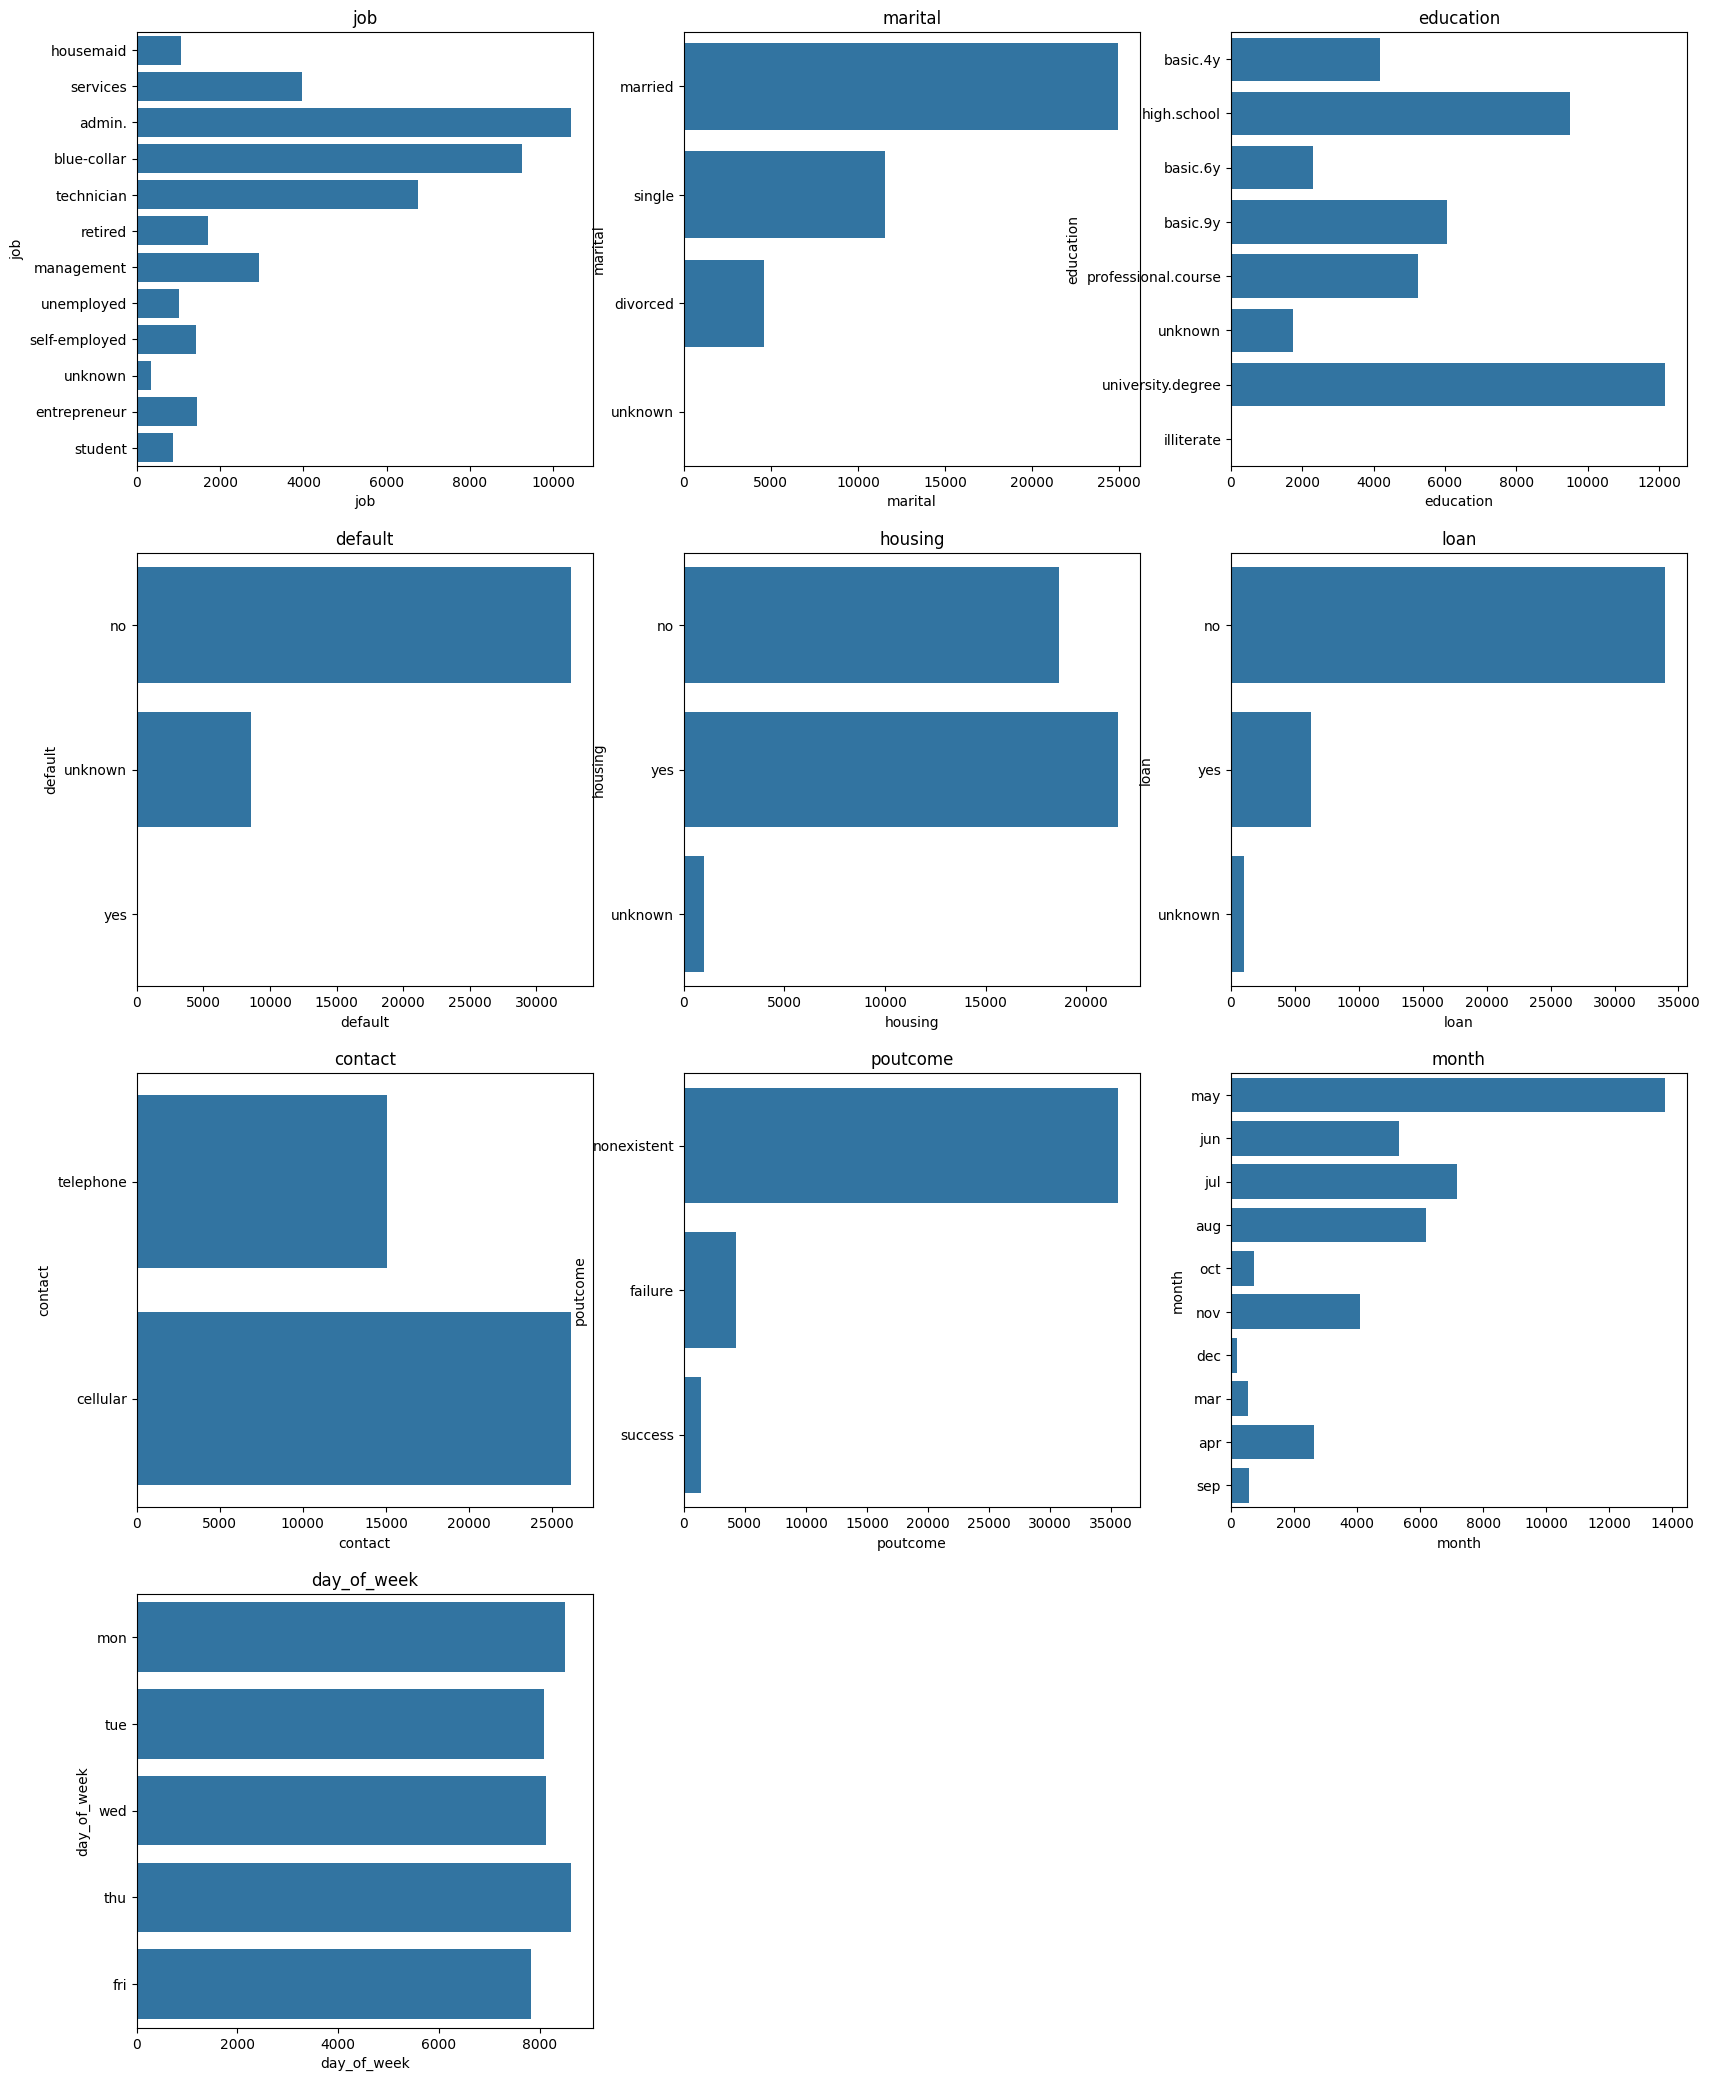

In [12]:
plt.figure(figsize=(20,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

Now we will find the relation ship between these categorical features and the target value to gain some insights

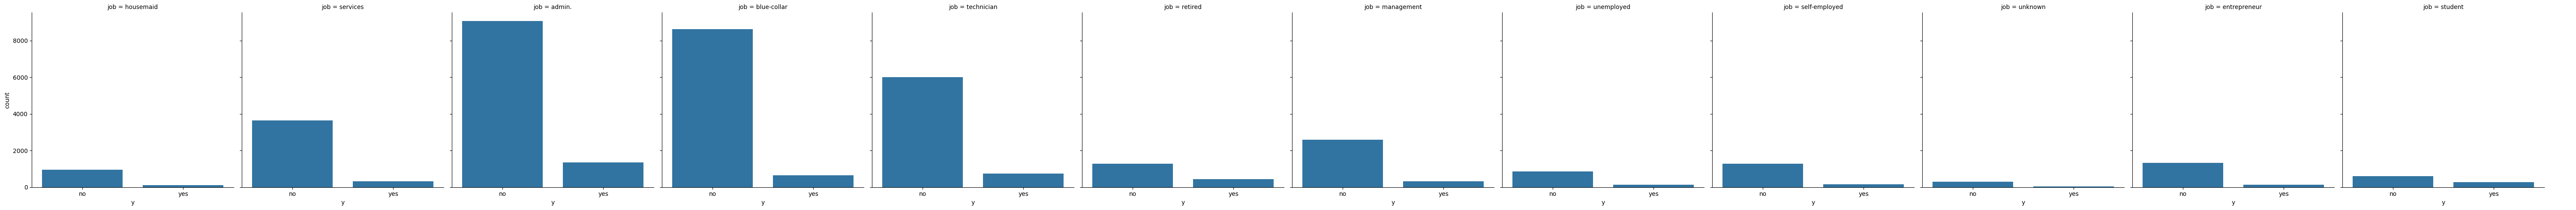

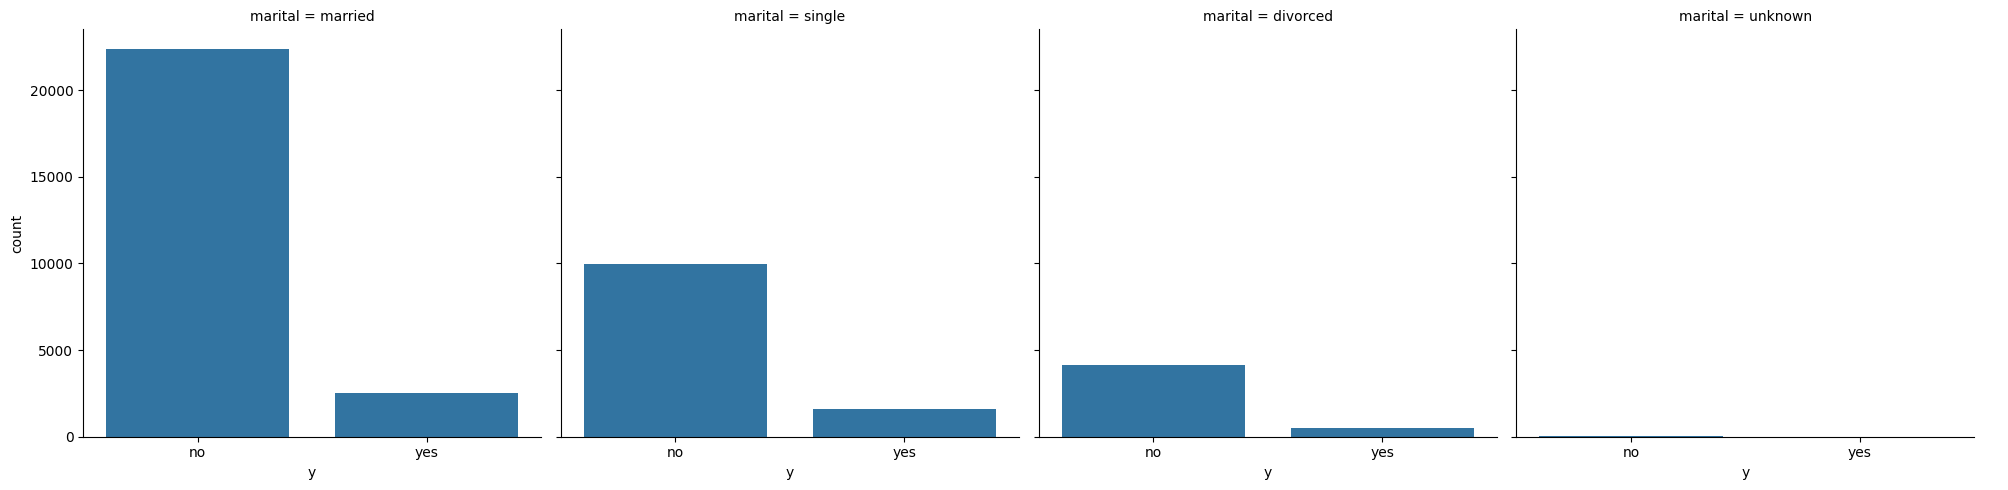

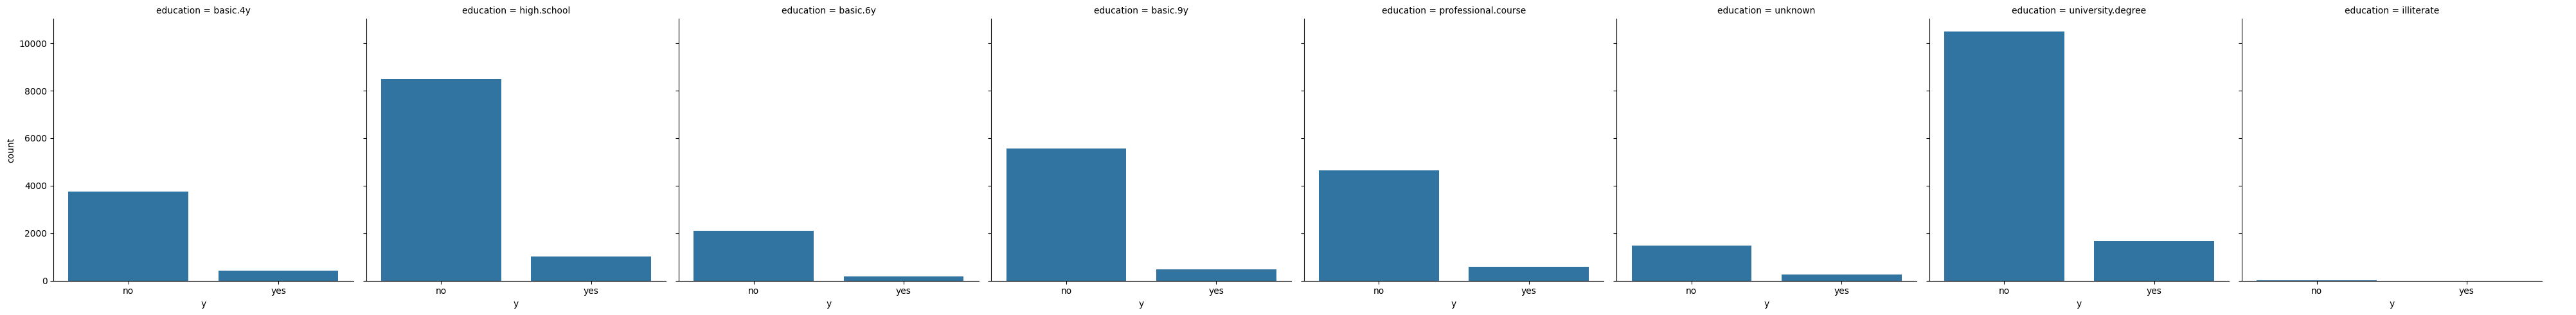

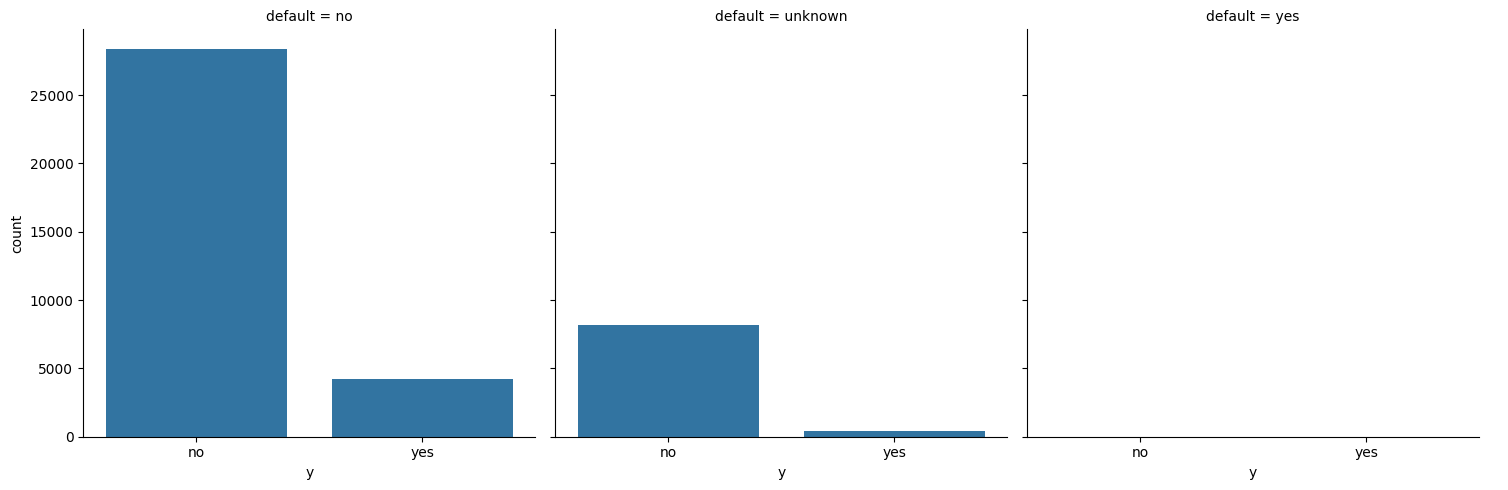

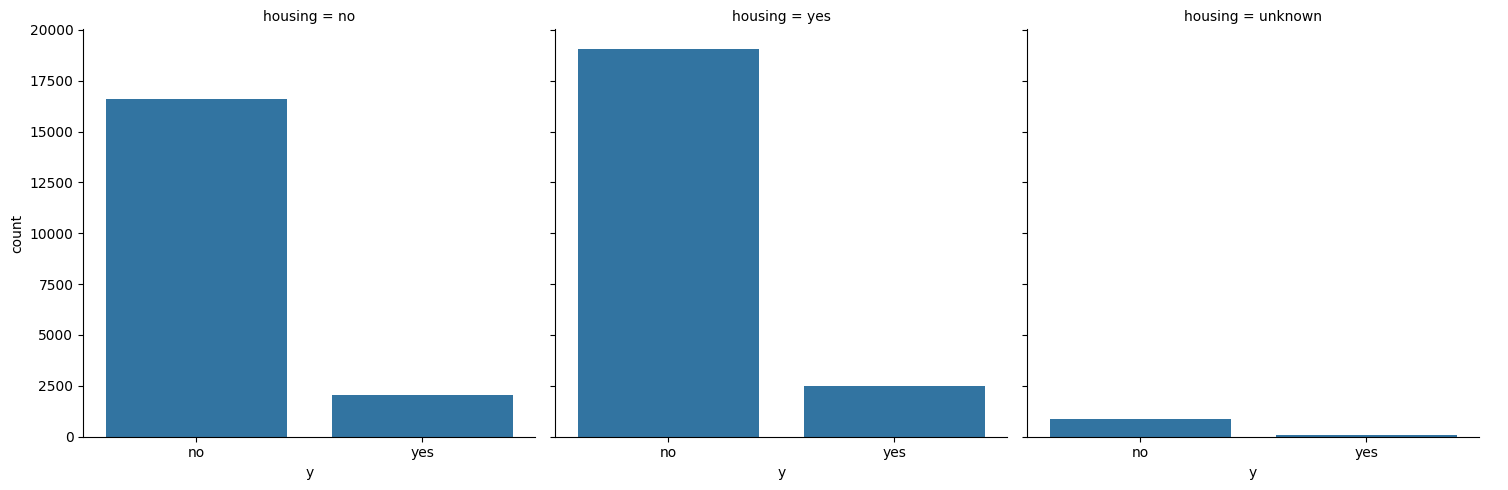

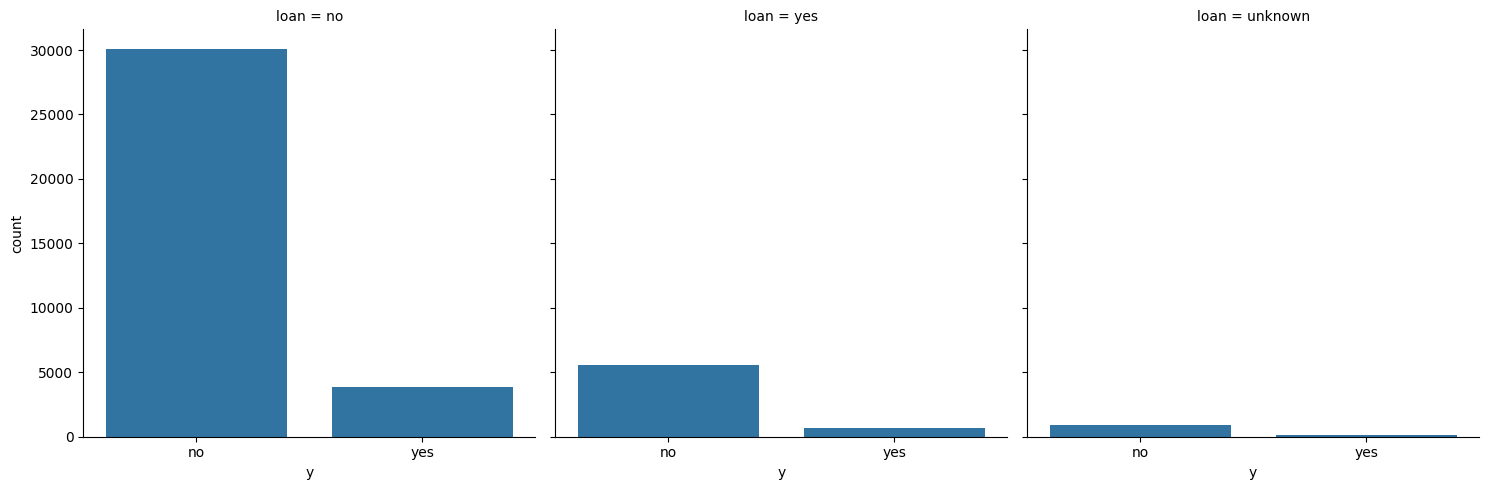

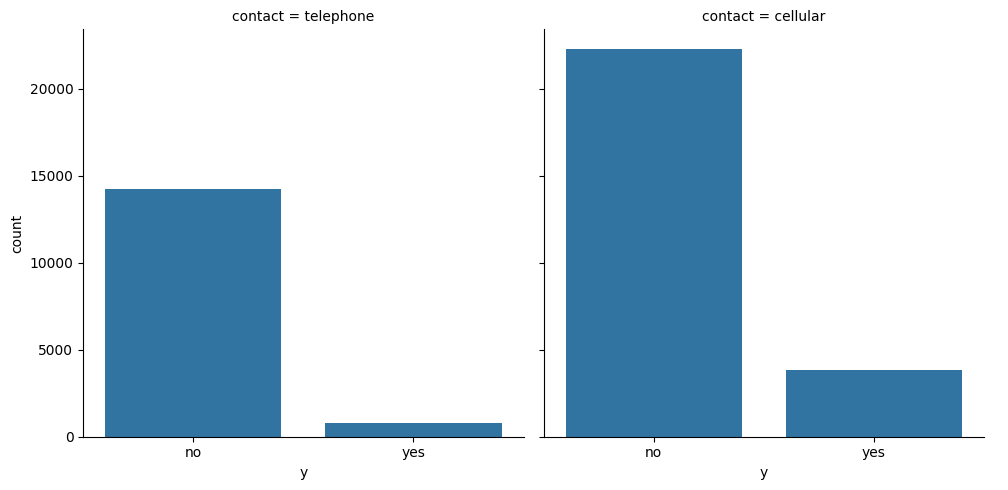

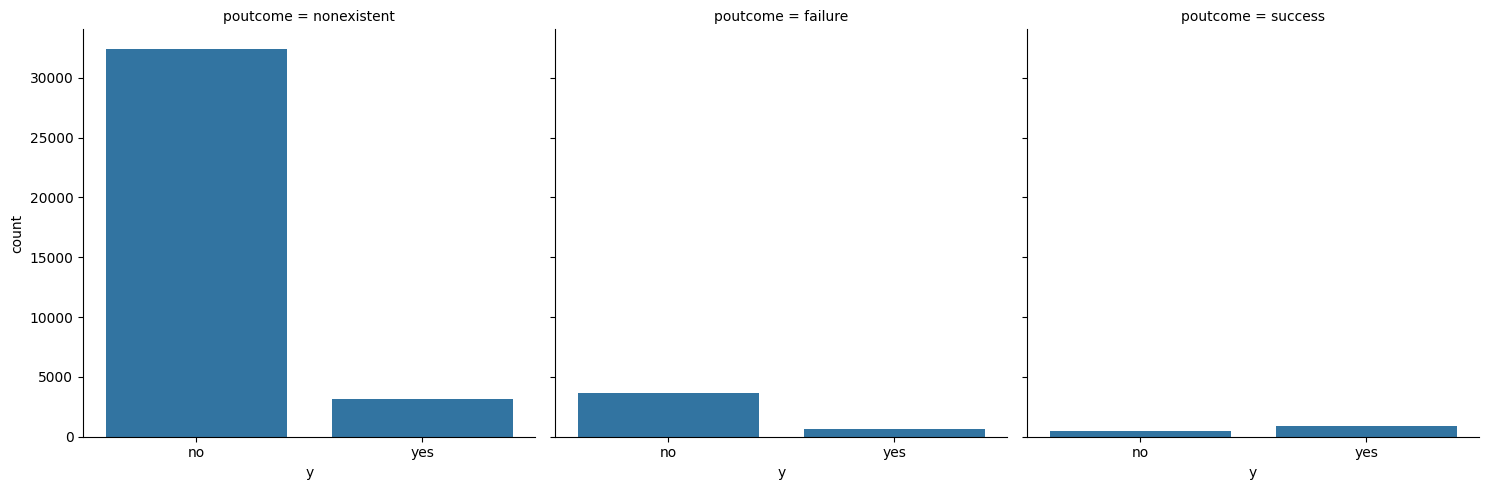

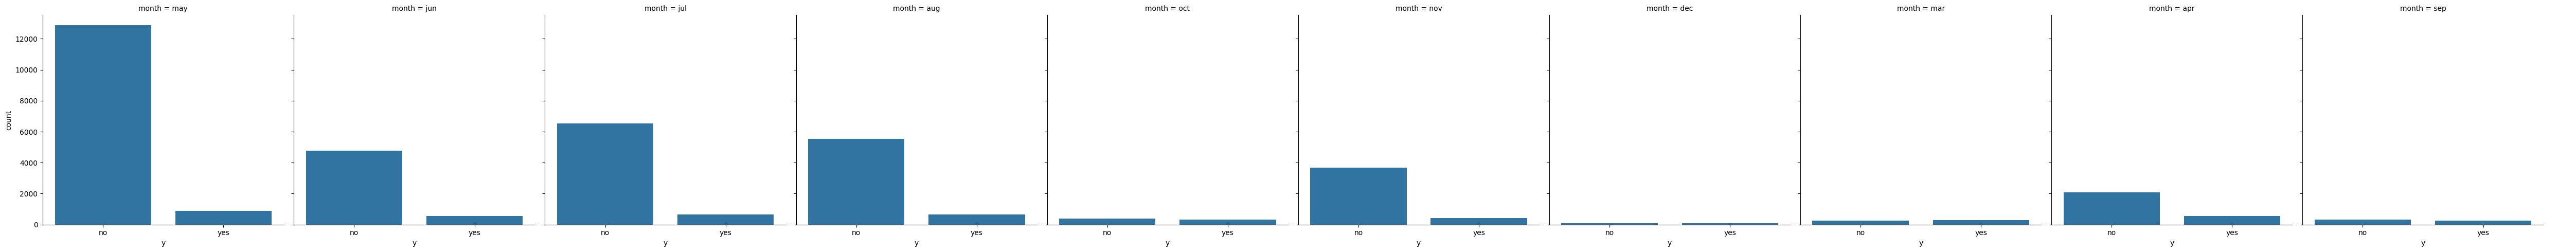

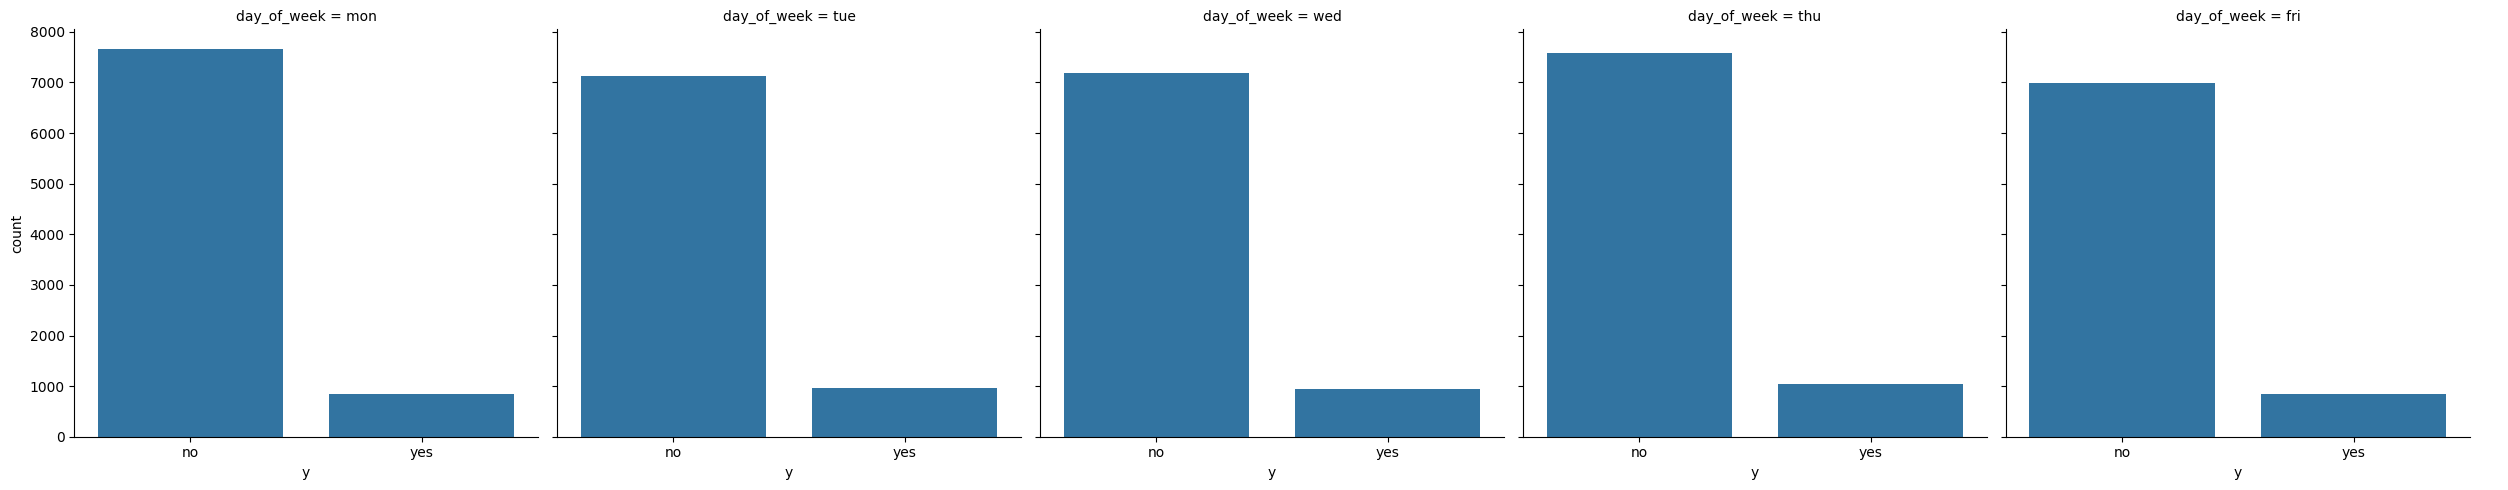

In [13]:
for categorical_feature in categorical_features:
    sns.catplot(x='y', col=categorical_feature, kind='count', data= df)
plt.show()

In [14]:
for categorical_feature in categorical_features:
    print(df.groupby(['y',categorical_feature]).size())

y    job          
no   admin.           9070
     blue-collar      8616
     entrepreneur     1332
     housemaid         954
     management       2596
     retired          1286
     self-employed    1272
     services         3646
     student           600
     technician       6013
     unemployed        870
     unknown           293
yes  admin.           1352
     blue-collar       638
     entrepreneur      124
     housemaid         106
     management        328
     retired           434
     self-employed     149
     services          323
     student           275
     technician        730
     unemployed        144
     unknown            37
dtype: int64
y    marital 
no   divorced     4136
     married     22396
     single       9948
     unknown        68
yes  divorced      476
     married      2532
     single       1620
     unknown        12
dtype: int64
y    education          
no   basic.4y                3748
     basic.6y                2104
     basic.9y   

### **Numerical Features**

In [15]:
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['y']))]

In [16]:
df[numerical_features].head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0


Now we will find the relation ship between these numerical features and the target value to gain some insights

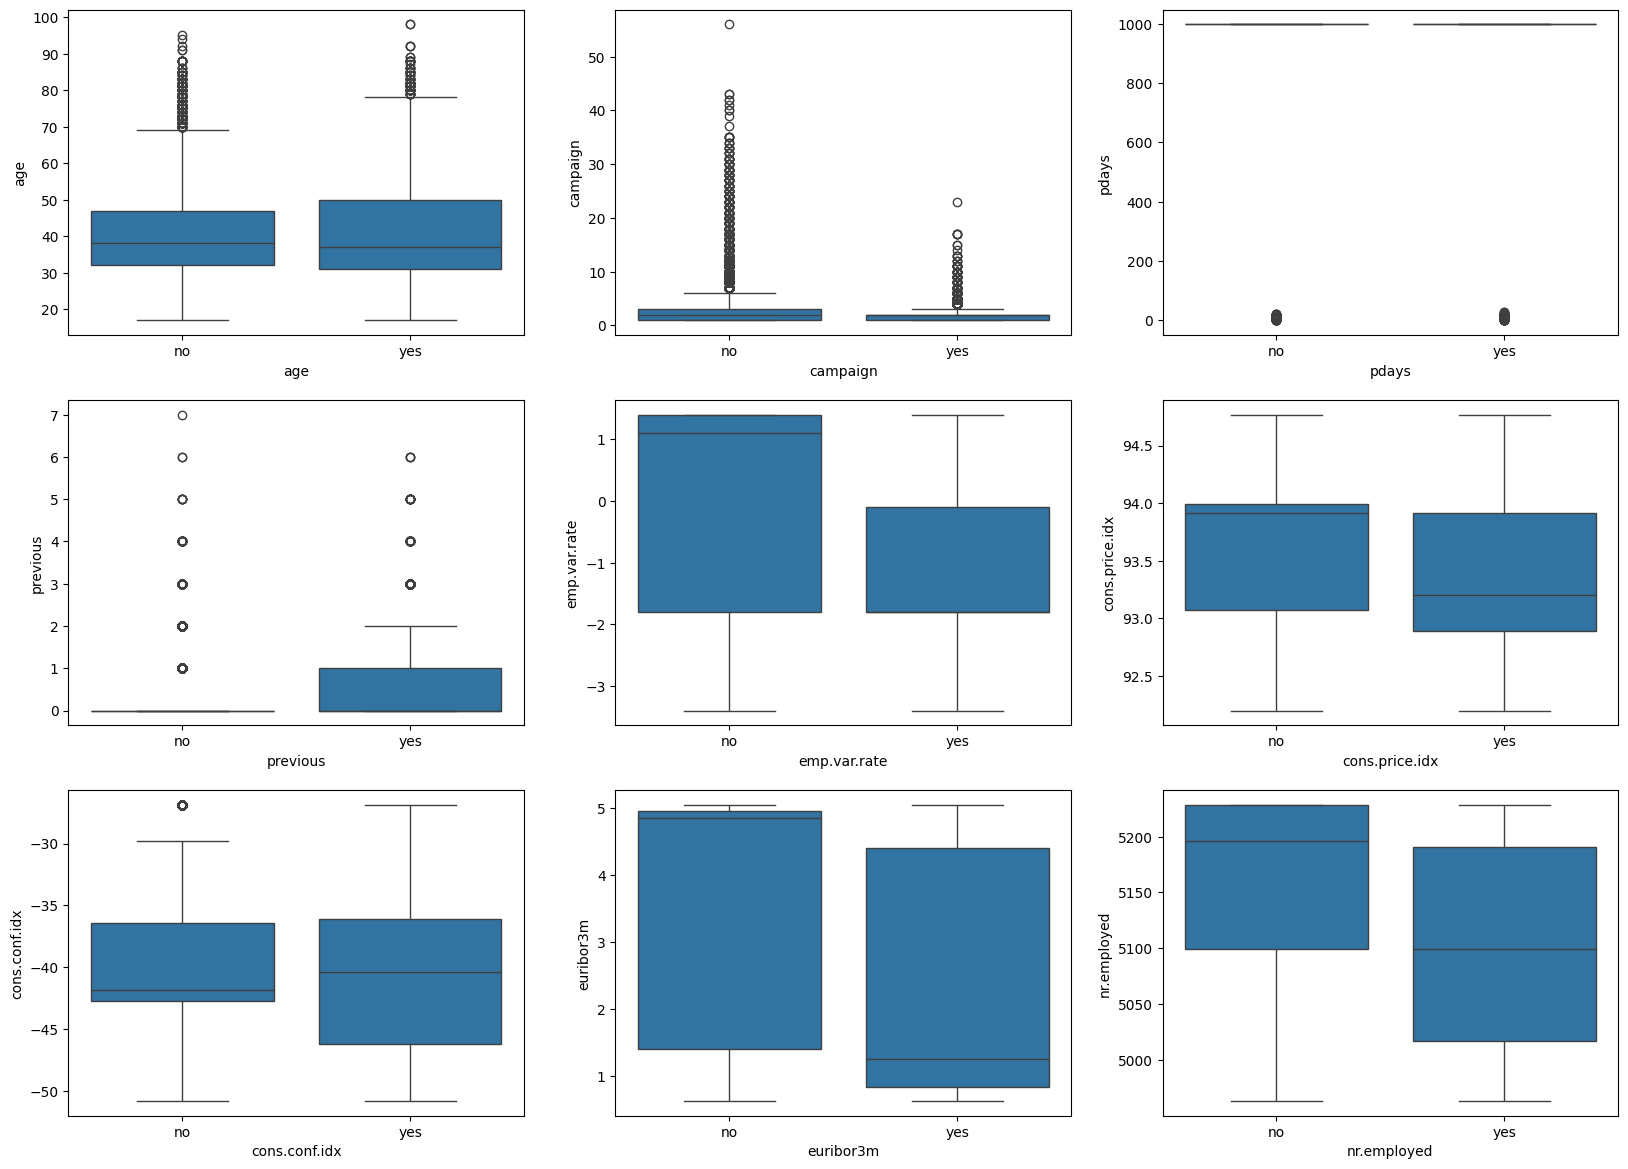

In [17]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y", y= df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

Plotting the Correlation matrix

<Axes: >

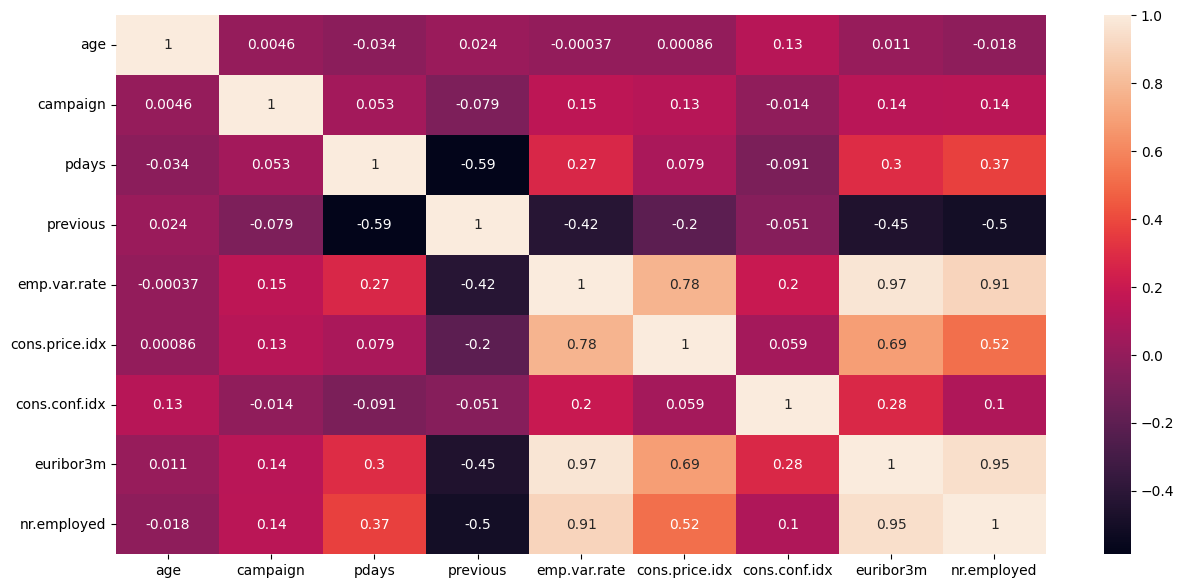

In [18]:
df2 = df[numerical_features] 
cor_mat=df2.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

**Now we will perform the most important step of the whole process, that is none other than, Creating a machine learning model**

# **Model Building**

### **Dividing the dataset into Independent and Dependent variables**

In [19]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [20]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

Here X contains independent variables and y contains dependent variable

### **Encoding the categorical data**

###Encoding the independent variable

In [21]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,3,4,5,6,7,8,9,13])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

###Encoding the dependent variable

In [22]:
le = LabelEncoder()
y = le.fit_transform(y)

### **Splitting the dataset into the Training set and Test set**

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

### **Feature Scaling**

In [24]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Now we will select a Classification Machine Leanrning Algorithms and make our Model based on it. But we can't decide which model will give the best output for the given dataset. So it is suggested to try all the models and select the best one**

### **1. Random Forest Classification Model**

In [25]:
rf_model = 'pkl files/rf_model.pkl'
rf_cross_val = 'pkl files/rf_cross_val.pkl'

In [26]:
from sklearn.ensemble import RandomForestClassifier
if os.path.exists(rf_model):
  rf_classifier = joblib.load(rf_model)

else:
  rf_classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
  rf_classifier.fit(X_train, y_train)
  joblib.dump(rf_classifier, rf_model)

In [27]:
y_pred = rf_classifier.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred)
accuracy_rf = accuracy_score(y_test, y_pred)

Applying k-Fold Cross Validation

In [28]:
if os.path.exists(rf_cross_val):
  rf_accuracies = joblib.load(rf_cross_val)

else:
  rf_accuracies = cross_val_score(estimator = rf_classifier, X = X_train, y = y_train, cv = 10, n_jobs=-1)
  joblib.dump(rf_accuracies, rf_cross_val)

In [29]:
print("Logistic Regression Classifier:")
print("Confusion Matrix:")
print(cm_rf)
print("Accuracy: {:.2f} %".format(accuracy_rf*100))
print("Cross-Validation Accuracy: {:.2f} %".format(rf_accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(rf_accuracies.std()*100))

Logistic Regression Classifier:
Confusion Matrix:
[[7086  208]
 [ 683  261]]
Accuracy: 89.18 %
Cross-Validation Accuracy: 89.11 %
Standard Deviation: 0.24 %


Now We will compute precision, recall, and F1-score for a this model**

In [30]:
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)

Now we will try the other models as well. The data preprocessing tasks such as feature scaling, categorical data encoding are used so often. so we will create a function to do that from the above code

### **2. Logistic Regression Model**

In [31]:
lr_model = 'pkl files/lr_model.pkl'
lr_cross_val = 'pkl files/lr_cross_val.pkl'

In [32]:
from sklearn.linear_model import LogisticRegression
if os.path.exists(lr_model):
  lr_classifier = joblib.load(lr_model)
else:
  lr_classifier = LogisticRegression(random_state=0)
  lr_classifier.fit(X_train, y_train)
  joblib.dump(lr_classifier, lr_model)

In [33]:
y_pred = lr_classifier.predict(X_test)
cm_lr = confusion_matrix(y_test, y_pred)
accuracy_lr = accuracy_score(y_test, y_pred)

Applying k-Fold Cross Validation

In [34]:
if os.path.exists(lr_cross_val):
  lr_accuracies = joblib.load(lr_cross_val)
else:
  lr_accuracies = cross_val_score(estimator=lr_classifier, X=X_train, y=y_train, cv=10, n_jobs=-1)
  joblib.dump(lr_accuracies, lr_cross_val)

In [35]:
print("Logistic Regression Classifier:")
print("Confusion Matrix:")
print(cm_lr)
print("Accuracy: {:.2f} %".format(accuracy_lr*100))
print("Cross-Validation Accuracy: {:.2f} %".format(lr_accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(lr_accuracies.std()*100))

Logistic Regression Classifier:
Confusion Matrix:
[[7187  107]
 [ 733  211]]
Accuracy: 89.80 %
Cross-Validation Accuracy: 89.99 %
Standard Deviation: 0.27 %


Now We will compute precision, recall, and F1-score for a this model

In [36]:
precision_lr = precision_score(y_test, y_pred)
recall_lr = recall_score(y_test, y_pred)
f1_lr = f1_score(y_test, y_pred)

### **Support Vector Machine(SVM) Model**

In [37]:
svm_model = 'pkl files/svm_model.pkl'
svm_cross_val = 'pkl files/svm_cross_val.pkl'

In [38]:
from sklearn.svm import SVC
if os.path.exists(svm_model):
  svm_classifier = joblib.load(svm_model)
else:
  svm_classifier = SVC(kernel='linear', random_state=0)
  svm_classifier.fit(X_train, y_train)
  joblib.dump(svm_classifier, svm_model)

In [39]:
y_pred = svm_classifier.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred)
accuracy_svm = accuracy_score(y_test, y_pred)

Applying k-Fold Cross Validation

In [40]:
if os.path.exists(svm_cross_val):
  svm_accuracies = joblib.load(svm_cross_val)
else:
  svm_accuracies = cross_val_score(estimator=svm_classifier, X=X_train, y=y_train, cv=10, n_jobs=-1)
  joblib.dump(svm_accuracies, svm_cross_val)

In [41]:
print("Support Vector Machine (SVM) Classifier:")
print("Confusion Matrix:")
print(cm_svm)
print("Accuracy: {:.2f} %".format(accuracy_svm*100))
print("Cross-Validation Accuracy: {:.2f} %".format(svm_accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(svm_accuracies.std()*100))

Support Vector Machine (SVM) Classifier:
Confusion Matrix:
[[7195   99]
 [ 757  187]]
Accuracy: 89.61 %
Cross-Validation Accuracy: 89.78 %
Standard Deviation: 0.32 %


Now We will compute precision, recall, and F1-score for a this model

In [42]:
precision_svm = precision_score(y_test, y_pred)
recall_svm = recall_score(y_test, y_pred)
f1_svm = f1_score(y_test, y_pred)

### **Kernel SVM Model**

In [43]:
svm_rbf_model = 'pkl files/svm_rbf_model.pkl'
svm_rbf_cross_val = 'pkl files/svm_rbf_cross_val.pkl'

In [44]:
from sklearn.svm import SVC
if os.path.exists(svm_rbf_model):
  svm_rbf_classifier = joblib.load(svm_rbf_model)
else:
  svm_rbf_classifier = SVC(kernel='rbf', random_state=0)
  svm_rbf_classifier.fit(X_train, y_train)
  joblib.dump(svm_rbf_classifier, svm_rbf_model)

In [45]:
y_pred = svm_rbf_classifier.predict(X_test)
cm_svm_rbf = confusion_matrix(y_test, y_pred)
accuracy_svm_rbf = accuracy_score(y_test, y_pred)

Applying k-Fold Cross Validation

In [46]:
if os.path.exists(svm_rbf_cross_val):
  svm_rbf_accuracies = joblib.load(svm_rbf_cross_val)
else:
  svm_rbf_accuracies = cross_val_score(estimator=svm_rbf_classifier, X=X_train, y=y_train, cv=10, n_jobs=-1)
  joblib.dump(svm_rbf_accuracies, svm_rbf_cross_val)

In [47]:
print("Support Vector Machine (SVM) Classifier with RBF kernel:")
print("Confusion Matrix:")
print(cm_svm_rbf)
print("Accuracy: {:.2f} %".format(accuracy_svm_rbf*100))
print("Cross-Validation Accuracy: {:.2f} %".format(svm_rbf_accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(svm_rbf_accuracies.std()*100))

Support Vector Machine (SVM) Classifier with RBF kernel:
Confusion Matrix:
[[7178  116]
 [ 733  211]]
Accuracy: 89.69 %
Cross-Validation Accuracy: 90.01 %
Standard Deviation: 0.22 %


Now We will compute precision, recall, and F1-score for a this model

In [48]:
precision_svm_rbf = precision_score(y_test, y_pred)
recall_svm_rbf = recall_score(y_test, y_pred)
f1_svm_rbf = f1_score(y_test, y_pred)

### **Decision Tree Classification Model**

In [49]:
dt_model = 'pkl files/dt_model.pkl'
dt_cross_val = 'pkl files/dt_cross_val.pkl'

In [50]:
from sklearn.tree import DecisionTreeClassifier
if os.path.exists(dt_model):
  dt_classifier = joblib.load(dt_model)
else:
  dt_classifier = DecisionTreeClassifier(random_state=0)
  dt_classifier.fit(X_train, y_train)
  joblib.dump(dt_classifier, dt_model)

In [51]:
y_pred = dt_classifier.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred)
accuracy_dt = accuracy_score(y_test, y_pred)

Applying k-Fold Cross Validation

In [52]:
if os.path.exists(dt_cross_val):
  dt_accuracies = joblib.load(dt_cross_val)
else:
  dt_accuracies = cross_val_score(estimator=dt_classifier, X=X_train, y=y_train, cv=10, n_jobs=-1)
  joblib.dump(dt_accuracies, dt_cross_val)

In [53]:
print("Decision Tree Classifier:")
print("Confusion Matrix:")
print(cm_dt)
print("Accuracy: {:.2f} %".format(accuracy_dt*100))
print("Cross-Validation Accuracy: {:.2f} %".format(dt_accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(dt_accuracies.std()*100))

Decision Tree Classifier:
Confusion Matrix:
[[6582  712]
 [ 618  326]]
Accuracy: 83.86 %
Cross-Validation Accuracy: 84.30 %
Standard Deviation: 0.35 %


Now We will compute precision, recall, and F1-score for a this model

In [54]:
precision_dt = precision_score(y_test, y_pred)
recall_dt = recall_score(y_test, y_pred)
f1_dt = f1_score(y_test, y_pred)

### **Naive Bayes Model**

In [55]:
nb_model = 'pkl files/nb_model.pkl'
nb_cross_val = 'pkl files/nb_cross_val.pkl'

In [56]:
from sklearn.naive_bayes import GaussianNB
if os.path.exists(nb_model):
  nb_classifier = joblib.load(nb_model)
else:
  nb_classifier = GaussianNB()
  nb_classifier.fit(X_train, y_train)
  joblib.dump(nb_classifier, nb_model)

In [57]:
y_pred = nb_classifier.predict(X_test)
cm_nb = confusion_matrix(y_test, y_pred)
accuracy_nb = accuracy_score(y_test, y_pred)

Applying k-Fold Cross Validation

In [58]:
if os.path.exists(nb_cross_val):
  nb_accuracies = joblib.load(nb_cross_val)
else:
  nb_accuracies = cross_val_score(estimator=nb_classifier, X=X_train, y=y_train, cv=10, n_jobs=-1)
  joblib.dump(nb_accuracies, nb_cross_val)

In [59]:
print("Gaussian Naive Bayes Classifier:")
print("Confusion Matrix:")
print(cm_nb)
print("Accuracy: {:.2f} %".format(accuracy_nb*100))
print("Cross-Validation Accuracy: {:.2f} %".format(nb_accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(nb_accuracies.std()*100))

Gaussian Naive Bayes Classifier:
Confusion Matrix:
[[5307 1987]
 [ 257  687]]
Accuracy: 72.76 %
Cross-Validation Accuracy: 72.27 %
Standard Deviation: 0.73 %


Now We will compute precision, recall, and F1-score for a this model

In [60]:
precision_nb = precision_score(y_test, y_pred)
recall_nb = recall_score(y_test, y_pred)
f1_nb = f1_score(y_test, y_pred)

### **K-Nearest Neighbors(K-NN) Model**

In [61]:
knn_model = 'pkl files/knn_model.pkl'
knn_cross_val = 'pkl files/knn_cross_val.pkl'

In [62]:
from sklearn.neighbors import KNeighborsClassifier
if os.path.exists(knn_model):
  knn_classifier = joblib.load(knn_model)
else:
  knn_classifier = KNeighborsClassifier(n_neighbors=50, metric='minkowski', p=2)
  knn_classifier.fit(X_train, y_train)
  joblib.dump(knn_classifier, knn_model)

In [63]:
y_pred = knn_classifier.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred)
accuracy_knn = accuracy_score(y_test, y_pred)

Applying k-Fold Cross Validation

In [64]:
if os.path.exists(knn_cross_val):
  knn_accuracies = joblib.load(knn_cross_val)
else:
  knn_accuracies = cross_val_score(estimator=knn_classifier, X=X_train, y=y_train, cv=10, n_jobs=-1)
  joblib.dump(knn_accuracies, knn_cross_val)

In [65]:
print("K-Nearest Neighbors (KNN) Classifier:")
print("Confusion Matrix:")
print(cm_knn)
print("Accuracy: {:.2f} %".format(accuracy_knn*100))
print("Cross-Validation Accuracy: {:.2f} %".format(knn_accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(knn_accuracies.std()*100))

K-Nearest Neighbors (KNN) Classifier:
Confusion Matrix:
[[7191  103]
 [ 752  192]]
Accuracy: 89.62 %
Cross-Validation Accuracy: 89.93 %
Standard Deviation: 0.27 %


Now We will compute precision, recall, and F1-score for a this model

In [66]:
precision_knn = precision_score(y_test, y_pred)
recall_knn = recall_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred)

### **XGBoost Model**

In [67]:
xgb_model = 'pkl files/xgb_model.pkl'
xgb_cross_val = 'pkl files/xgb_cross_val.pkl'

In [68]:
from xgboost import XGBClassifier
if os.path.exists(xgb_model):
  xgb_classifier = joblib.load(xgb_model)

else:
  xgb_classifier = XGBClassifier()
  xgb_classifier.fit(X_train, y_train)
  joblib.dump(xgb_classifier, xgb_model)

In [69]:
y_pred = xgb_classifier.predict(X_test)
cm_xgb = confusion_matrix(y_test, y_pred)
accuracy_xgb = accuracy_score(y_test, y_pred)

Applying k-Fold Cross Validation

In [70]:
if os.path.exists(xgb_cross_val):
  xgb_accuracies = joblib.load(xgb_cross_val)

else:
  xgb_accuracies = cross_val_score(estimator=xgb_classifier, X=X_train, y=y_train, cv=10, n_jobs=-1)
  joblib.dump(xgb_accuracies, xgb_cross_val)

In [71]:
print("XGBoost Classifier:")
print("Confusion Matrix:")
print(cm_xgb)
print("Accuracy: {:.2f} %".format(accuracy_xgb*100))
print("Cross-Validation Accuracy: {:.2f} %".format(xgb_accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(xgb_accuracies.std()*100))

XGBoost Classifier:
Confusion Matrix:
[[7098  196]
 [ 673  271]]
Accuracy: 89.45 %
Cross-Validation Accuracy: 89.73 %
Standard Deviation: 0.33 %


Now We will compute precision, recall, and F1-score for a this model

In [72]:
precision_xgb = precision_score(y_test, y_pred)
recall_xgb = recall_score(y_test, y_pred)
f1_xgb = f1_score(y_test, y_pred)

# **Model Evaluation**

**Now after training all the model, we will evaluate these models throgh the dfferent metric we calculated, like Accuracy (Cross Validation Accuracy to be precise), Precision, recall, f1 score etc**

In [73]:
model_names = ['Random Forest', 'Logistic Regression', 'SVM', 'Kernel SVM','Decision Tree','Naive Bayes', 'KNN', 'XGBoost']
accuracy_scores = [rf_accuracies.mean(), lr_accuracies.mean(), svm_accuracies.mean(), svm_rbf_accuracies.mean(), dt_accuracies.mean(), nb_accuracies.mean(), knn_accuracies.mean(), xgb_accuracies.mean()]
precision_scores = [precision_rf, precision_lr, precision_svm, precision_svm_rbf, precision_dt, precision_nb, precision_knn, precision_xgb]
recall_scores = [recall_rf, recall_lr, recall_svm, recall_svm_rbf, recall_dt, recall_nb, recall_knn, recall_xgb]
f1_scores = [f1_rf, f1_lr, f1_svm, f1_svm_rbf, f1_dt, f1_nb, f1_knn, f1_xgb]

In [74]:
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-score': f1_scores
})

In [75]:
results_df

,Model,Accuracy,Precision,Recall,F1-score
0,Random Forest,0.891138,0.556503,0.276483,0.369427
1,Logistic Regression,0.899939,0.663522,0.223517,0.334390
2,SVM,0.897754,0.653846,0.198093,0.304065
3,Kernel SVM,0.900061,0.645260,0.223517,0.332022
4,Decision Tree,0.843005,0.314066,0.345339,0.328961
5,Naive Bayes,0.722671,0.256918,0.727754,0.379768
6,KNN,0.899332,0.650847,0.203390,0.309927
7,XGBoost,0.897329,0.580300,0.287076,0.384125


In [76]:
best_model = results_df.loc[results_df['Accuracy'].idxmax()]
print(f"\nBest Model (based on accuracy): {best_model['Model']}")


Best Model (based on accuracy): Kernel SVM


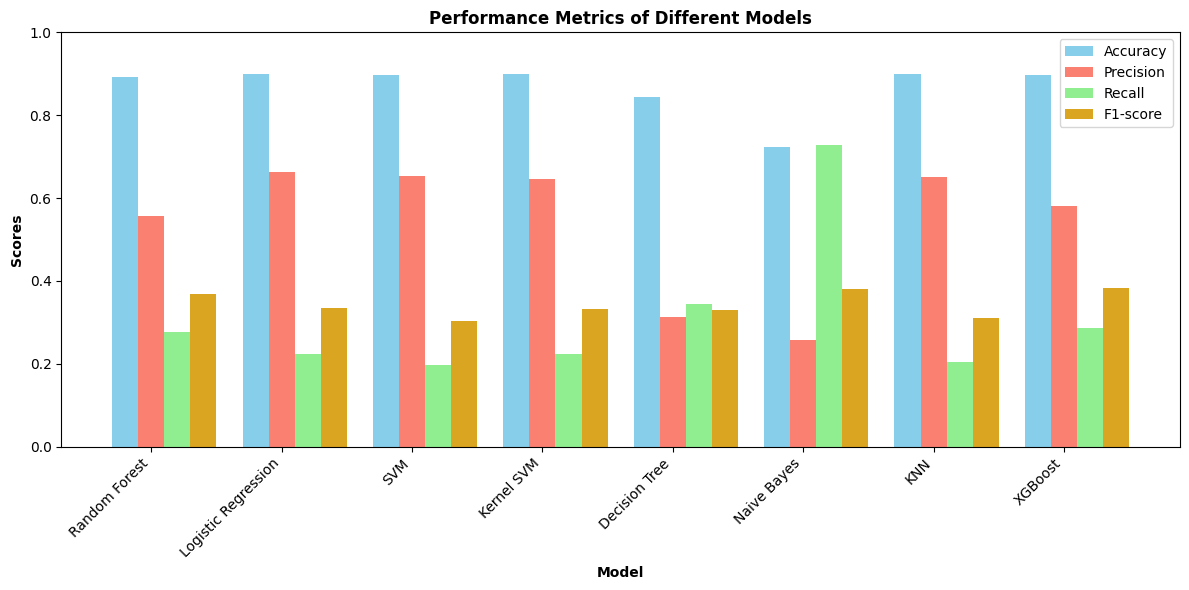

In [77]:
bar_width = 0.2

r1 = np.arange(len(model_names))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

plt.figure(figsize=(12, 6))
plt.bar(r1, accuracy_scores, color='skyblue', width=bar_width, label='Accuracy')
plt.bar(r2, precision_scores, color='salmon', width=bar_width, label='Precision')
plt.bar(r3, recall_scores, color='lightgreen', width=bar_width, label='Recall')
plt.bar(r4, f1_scores, color='goldenrod', width=bar_width, label='F1-score')

plt.xlabel('Model', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.title('Performance Metrics of Different Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(model_names))], model_names, rotation=45, ha='right')
plt.ylim(0, 1)  
plt.legend()

plt.tight_layout()
plt.show()

# **Conclusion**

So we can clearly see that Kernel SVM is the best model for this particular dataset solely based on the Accuracy. But Accuracy is often not the best metric for model evalutaion. So here is the conclusion of this project based on different metrics

---

**Accuracy** : Logistic Regression and Kernel SVM models achieved the highest accuracy, both around 90%. This indicates that these models have the best overall performance in terms of correctly predicting the class labels


**Precision** : Logistic Regression, SVM, and KNN models have relatively higher precision values compared to other models. This suggests that these models have a lower rate of false positive predictions, meaning they are better at correctly identifying positive cases.


**Recall** : Naive Bayes model achieved the highest recall score, indicating its ability to effectively capture a high proportion of actual positive cases. However, it comes at the expense of precision, as indicated by its lower precision score.


**F1-score** : F1-score balances precision and recall, providing an overall measure of a model's performance. XGBoost and Random Forest models have the highest F1-scores, indicating a good balance between precision and recall.


**Decision Tree Performance** : Decision Tree model shows relatively lower performance compared to other models in terms of accuracy, precision, recall, and F1-score. This suggests that the Decision Tree model may not be the best choice for this particular classification task.


**Consideration for Trade-offs** : Depending on the specific needs of the application, different models may be preferred. For example, if the goal is to minimize false positives (maximize precision), Logistic Regression or SVM might be preferable. If capturing as many true positives as possible is critical (maximize recall), Naive Bayes might be more suitable.

**Important Note** : This is a huge dataset consisting of 21 features and nearly 40,000 samples. Due to the lack of computational power and significant time taken by grid search for hyperparameter tuning, the models in this evaluation were trained using default hyperparameters. So there is a massive scope for  improvement in these models by using different methods to tune hyperparameters